# **Аналитика интернет-магазина**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
sales = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sales_v2023-07-09.csv', sep=',')
sales.head()

,order_id,date,customer_id,category,region,sales,quantity,discount
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00


In [ ]:
returns = pd.read_csv('/content/drive/My Drive/Colab Notebooks/returns_v2023-07-09.csv', sep=',')
returns.head()

,order_id,return
0,59570135,0
1,16578697,0
2,46943601,0
3,42436035,0
4,49798299,0


In [ ]:
joined = sales.merge(returns, on='order_id')
joined.head()

,order_id,date,customer_id,category,region,sales,quantity,discount,return
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00,0
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05,0
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10,0
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03,0
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00,0


### Отфильтруем по категориям "Одежда и обувь" и "Бытовая техника"

In [ ]:
filtered = joined[joined['category'].isin(['Одежда и обувь', 'Бытовая техника'])]
filtered.head()
# joined[(joined['category'] == 'Одежда и обувь') |
# (joined['category'] == 'Бытовая техника')].head()


,order_id,date,customer_id,category,region,sales,quantity,discount,return
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00,0
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05,0
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10,0
12,3088702,2017-09-05,513,Одежда и обувь,Московская область,1932,1,0.05,0
28,94577895,2017-08-05,516,Одежда и обувь,Хабаровский край,1210,1,0.10,0


### Считаем, в каком регионе были наибольшие продажи

In [ ]:
filtered.groupby('region').agg({'sales': 'sum'}).sort_values('sales', ascending=False).head()

,sales
region,
Амурская область,246020174
Московская область,243303435
Хабаровский край,195830763
Ленинградская область,194335595
Приморский край,148651687


### Посмотрим долю возвратов для каждого региона

In [ ]:
pivot = joined.pivot_table(index='region', columns='return', values='sales', aggfunc='count')
pivot.head()

return,0,1
region,,
Амурская область,150114,72117
Владимирская область,67494,23080
Иркутская область,93629,39018
Краснодарский край,107629,25989
Красноярский край,61908,28426


In [ ]:
pivot['return_ratio'] = pivot[0] / (pivot[0] + pivot[1])
pivot

return,0,1,return_ratio
region,,,
Амурская область,150114,72117,0.675486
Владимирская область,67494,23080,0.745181
Иркутская область,93629,39018,0.705851
Краснодарский край,107629,25989,0.805498
Красноярский край,61908,28426,0.685323
Ленинградская область,136665,39939,0.773850
Московская область,175699,45141,0.795594
Приморский край,91062,43482,0.676819
Смоленская область,73957,14581,0.835314


## Визуализация

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Доля возвратов по регионам**

<Axes: xlabel='region', ylabel='return_ratio'>

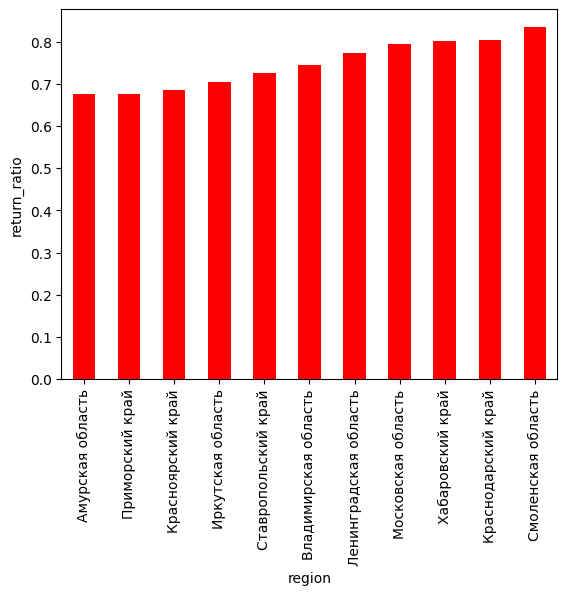

In [ ]:
pivot['return_ratio'].sort_values(ascending=True).plot(kind='bar', color='red', ylabel='return_ratio')

**Продажи по регионам**

<Axes: xlabel='region', ylabel='sales'>

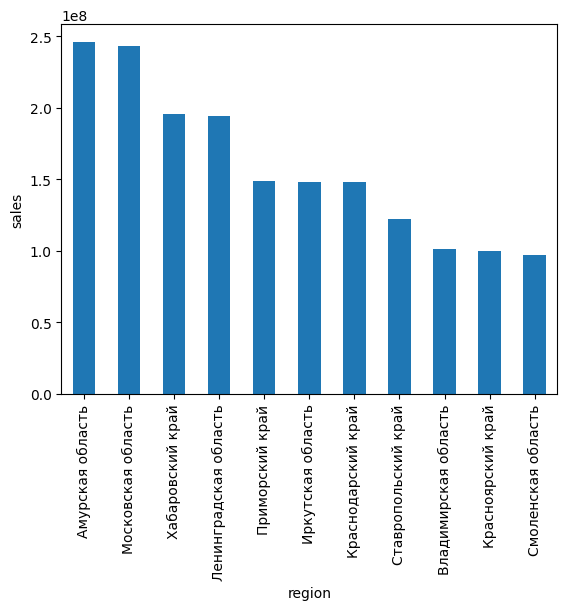

In [ ]:
filtered.groupby('region').agg({'sales': 'sum'}).sort_values('sales', ascending=False).plot(kind='bar', ylabel='sales', legend=False)